In [2]:
import matplotlib
import matplotlib.pylab as plt
import string
import os
from subprocess import call
import glob2 as glob
import numpy as np
from scipy.ndimage import imread
from PIL import Image, ImageFont, ImageDraw, ImageOps
import peakutils
%matplotlib inline

In [5]:
# create 25x25 patches representing each letter in the alphabet
alphabet = string.ascii_lowercase + ' ' 
letters = []
for letter in alphabet:
    im = Image.new("RGB", (25, 25))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype("fonts/giordano/giordano-webfont.ttf", 32)
    draw.text((0, 0), letter, font=font)
    letters.append(np.array(im.convert('L')))
letters = np.array(letters, dtype=np.float32)

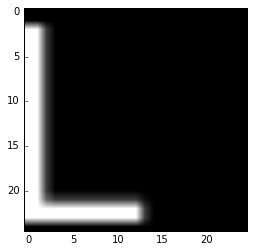

In [12]:
# plot one character from ttf
plt.imshow(letters[0], cmap='gray')

In [13]:
# load text data
filepath = 'img/optimized/imagem1.jpeg'
img = Image.open(filepath) # open colour image
data = np.array(ImageOps.invert(img.convert('L')), dtype=np.float32)
data /= data.max()

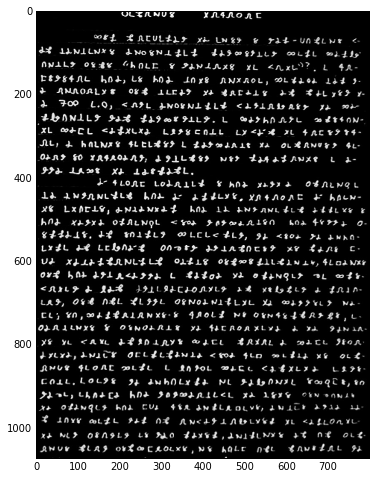

In [14]:
# plot text data
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='gray')

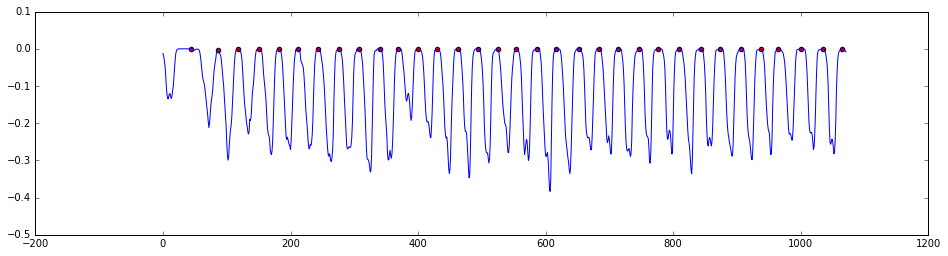

In [15]:
# find and plot beginning and end of lines 
avg_black_per_row = -1*np.mean(data, axis=1)
peaks_row = peakutils.indexes(avg_black_per_row, thres=0.9, min_dist=10)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(avg_black_per_row)
ax.scatter(peaks_row, avg_black_per_row[peaks_row], c='red')

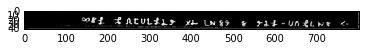

In [16]:
# confirm that line looks correct
plt.imshow(data[peaks_row[0]:peaks_row[1], :], cmap='gray', interpolation='none')

In [34]:
# find beginning and end of words given each line
char_ids_per_line = []
for i in range(len([peaks_row])):
    line = data[peaks_row[i]:peaks_row[i+1]]
    avg_black_per_col = -1*np.mean(line.T, axis=1)
    #peaks_col = find_peaks_cwt(avg_black_per_col, np.arange(1, 25))
    peaks_col = peakutils.indexes(avg_black_per_col, min_dist=10)
    char_ids_per_line.append(peaks_col)

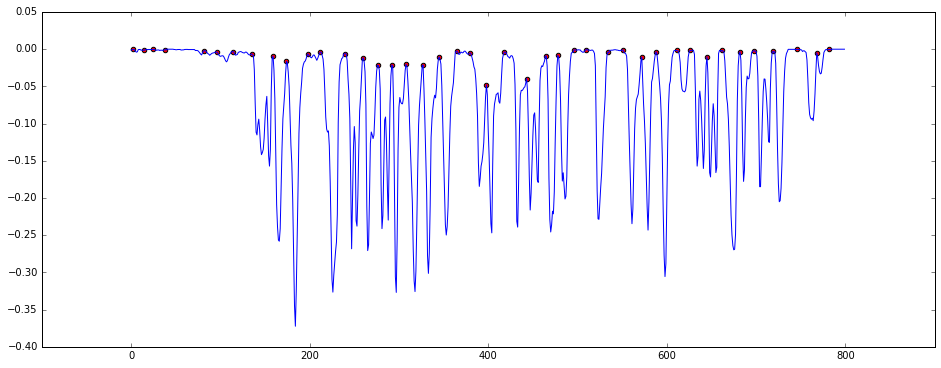

In [36]:
# visualize begining and end of words
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(avg_black_per_col)
ax.scatter(peaks_col, avg_black_per_col[peaks_col], c='red')

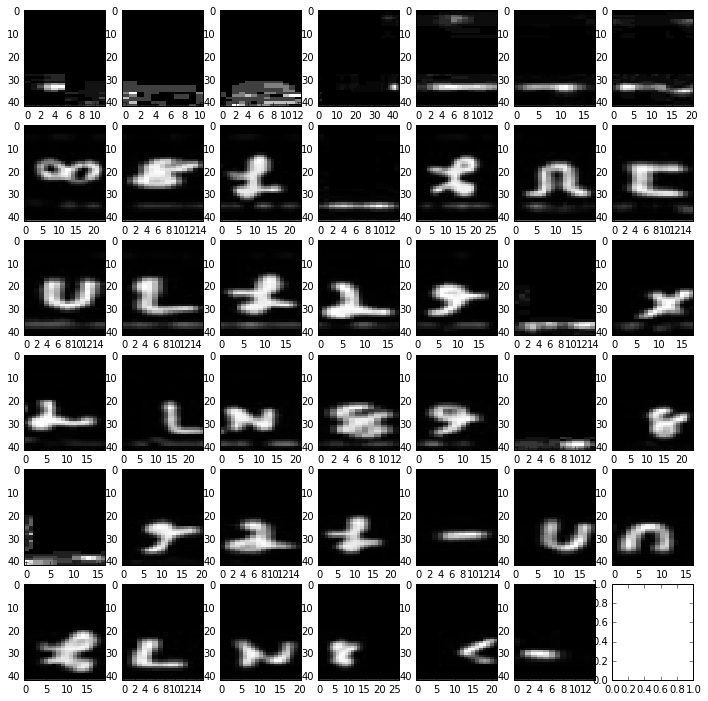

In [41]:
# visualize segmented characters given last line
fig, axes = plt.subplots(6, int(len(peaks_col)/6), figsize=(12, 12))
axes = axes.flatten()
for i in range(len(peaks_col)-1):
    axes[i].imshow(line[:, peaks_col[i]:peaks_col[i+1]], aspect='auto', interpolation='None', cmap='gray')